# Read the CSV file

In [ ]:
import pandas as pd

df = pd.read_csv('/content/bollywood.csv')
display(df.head())

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


# 1. How many records are present in the dataset? Print the metadata information of the dataset.

In [ ]:
print(f"Number of records: {df.shape[0]}")
df.info()

Number of records: 149
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


# 2. How many movies got released in each genre? Which genre had highest number of releases? Sort number of releases in each genre in descending order.

In [ ]:
genre_counts = df['Genre'].value_counts()
print("Number of movies released in each genre:")
display(genre_counts)
print(f"\nGenre with the highest number of releases: {genre_counts.index[0]} ({genre_counts.iloc[0]} releases)")

Number of movies released in each genre:


,count
Genre,
Comedy,36
Drama,35
Thriller,29
Romance,25
Action,24



Genre with the highest number of releases: Comedy (36 releases)


# 3. How many movies in each genre got released in different release times like long weekend, festive season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.)

In [ ]:
cross_tab = pd.crosstab(df['Genre'], df['ReleaseTime'])
print("Cross-tabulation of Genre and Release Time:")
display(cross_tab)

Cross-tabulation of Genre and Release Time:


ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


# 4. Which month of the year, maximum number movie releases are seen? (Note: Extract a new column called month from ReleaseDate column.)

In [ ]:
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%d-%b-%y')
df['Month'] = df['Release Date'].dt.month_name()
month_counts = df['Month'].value_counts()

print("Number of movie releases in each month:")
display(month_counts)

most_releases_month = month_counts.index[0]
most_releases_count = month_counts.iloc[0]
print(f"\nThe month with the maximum number of movie releases is: {most_releases_month} ({most_releases_count} releases)")

Number of movie releases in each month:


,count
Month,
January,20
March,19
May,18
July,16
February,16
April,11
June,10
September,10
November,10



The month with the maximum number of movie releases is: January (20 releases)


# 5. Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?

In [ ]:
high_budget_movies = df[df['Budget'] >= 25]
high_budget_month_counts = high_budget_movies['Month'].value_counts()

print("Number of high-budget movie releases in each month:")
display(high_budget_month_counts)

most_releases_high_budget_month = high_budget_month_counts.index[0]
most_releases_high_budget_count = high_budget_month_counts.iloc[0]
print(f"\nThe month with the maximum number of high-budget movie releases is: {most_releases_high_budget_month} ({most_releases_high_budget_count} releases)")

Number of high-budget movie releases in each month:


,count
Month,
February,9
January,8
August,7
March,7
November,6
July,6
June,5
September,5
April,4



The month with the maximum number of high-budget movie releases is: February (9 releases)


# 6. Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget.

In [ ]:
df['ROI'] = (df['BoxOfficeCollection'] - df['Budget']) / df['Budget']
top_10_roi = df.sort_values(by='ROI', ascending=False).head(10)

print("Top 10 movies with maximum Return on Investment (ROI):")
display(top_10_roi[['MovieName', 'Budget', 'BoxOfficeCollection', 'ROI']])

Top 10 movies with maximum Return on Investment (ROI):


,MovieName,Budget,BoxOfficeCollection,ROI
64,Aashiqui 2,12,110.0,8.166667
89,PK,85,735.0,7.647059
132,Grand Masti,35,298.0,7.514286
135,The Lunchbox,10,85.0,7.500000
87,Fukrey,5,36.2,6.240000
58,Mary Kom,15,104.0,5.933333
128,Shahid,6,40.0,5.666667
37,Humpty Sharma Ki Dulhania,20,130.0,5.500000
101,Bhaag Milkha Bhaag,30,164.0,4.466667
115,Chennai Express,75,395.0,4.266667


# 7. Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the  average ROI for different release times.

In [ ]:
average_roi_by_release_time = df.groupby('ReleaseTime')['ROI'].mean()

print("Average ROI for different release times:")
display(average_roi_by_release_time)

Average ROI for different release times:


,ROI
ReleaseTime,
FS,0.973853
HS,0.850867
LW,1.127205
N,0.657722


# 8. Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the plot  to conclude if the most movies are high or low budgeted movies.

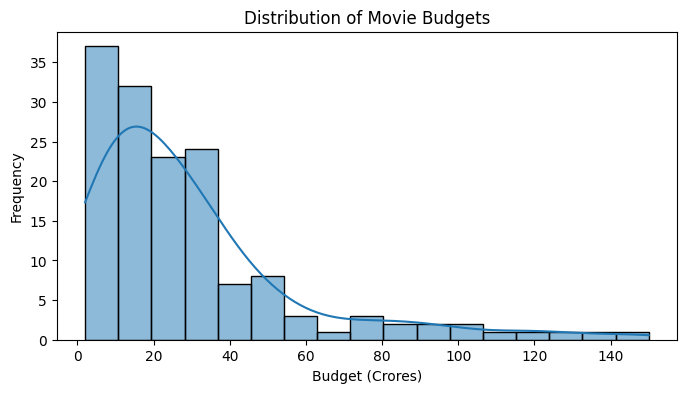

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(df['Budget'], kde=True)
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget (Crores)')
plt.ylabel('Frequency')
plt.show()

# 9. Compare the distribution of ROIs between movies with comedy genre and drama. Which genre typically sees higher ROIs?

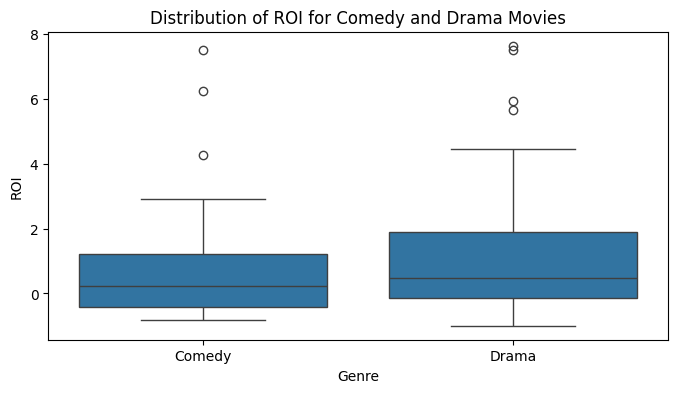


Average ROI for Comedy and Drama genres:


,ROI
Genre,
Comedy,0.788394
Drama,1.357455



Drama genre typically sees higher average ROIs.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

comedy_drama_df = df[df['Genre'].isin(['Comedy', 'Drama'])]

plt.figure(figsize=(8, 4))
sns.boxplot(x='Genre', y='ROI', data=comedy_drama_df)
plt.title('Distribution of ROI for Comedy and Drama Movies')
plt.xlabel('Genre')
plt.ylabel('ROI')
plt.show()

average_roi_comedy_drama = comedy_drama_df.groupby('Genre')['ROI'].mean()
print("\nAverage ROI for Comedy and Drama genres:")
display(average_roi_comedy_drama)

if average_roi_comedy_drama['Comedy'] > average_roi_comedy_drama['Drama']:
    print("\nComedy genre typically sees higher average ROIs.")
elif average_roi_comedy_drama['Drama'] > average_roi_comedy_drama['Comedy']:
    print("\nDrama genre typically sees higher average ROIs.")
else:
    print("\nBoth Comedy and Drama genres have similar average ROIs.")

# 10. Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?

In [ ]:
import pandas as pd

df = pd.read_csv('/content/bollywood.csv')

correlation = df['BoxOfficeCollection'].corr(df['YoutubeLikes'])

print(f"Correlation between Box Office Collection and YouTube Likes: {correlation:.2f}")

if correlation > 0:
    print("\nThe correlation is positive, suggesting that as YouTube likes increase, Box Office Collection tends to increase as well.")
elif correlation < 0:
    print("\nThe correlation is negative, suggesting that as YouTube likes increase, Box Office Collection tends to decrease.")
else:
    print("\nThere is no significant linear correlation between Box Office Collection and YouTube Likes.")

Correlation between Box Office Collection and YouTube Likes: 0.68

The correlation is positive, suggesting that as YouTube likes increase, Box Office Collection tends to increase as well.


# 11. Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.

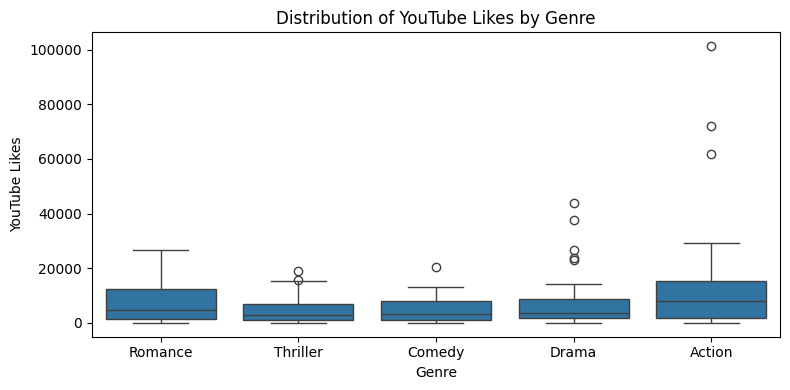


Average YouTube Likes by Genre:


,YoutubeLikes
Genre,
Action,16744.708333
Drama,7973.628571
Romance,7089.640000
Thriller,4941.793103
Comedy,4784.722222


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(x='Genre', y='YoutubeLikes', data=df)
plt.title('Distribution of YouTube Likes by Genre')
plt.xlabel('Genre')
plt.ylabel('YouTube Likes')
plt.tight_layout()
plt.show()

average_likes_by_genre = df.groupby('Genre')['YoutubeLikes'].mean().sort_values(ascending=False)
print("\nAverage YouTube Likes by Genre:")
display(average_likes_by_genre)

# 12. Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated? Note: Draw pair plot or heatmap.

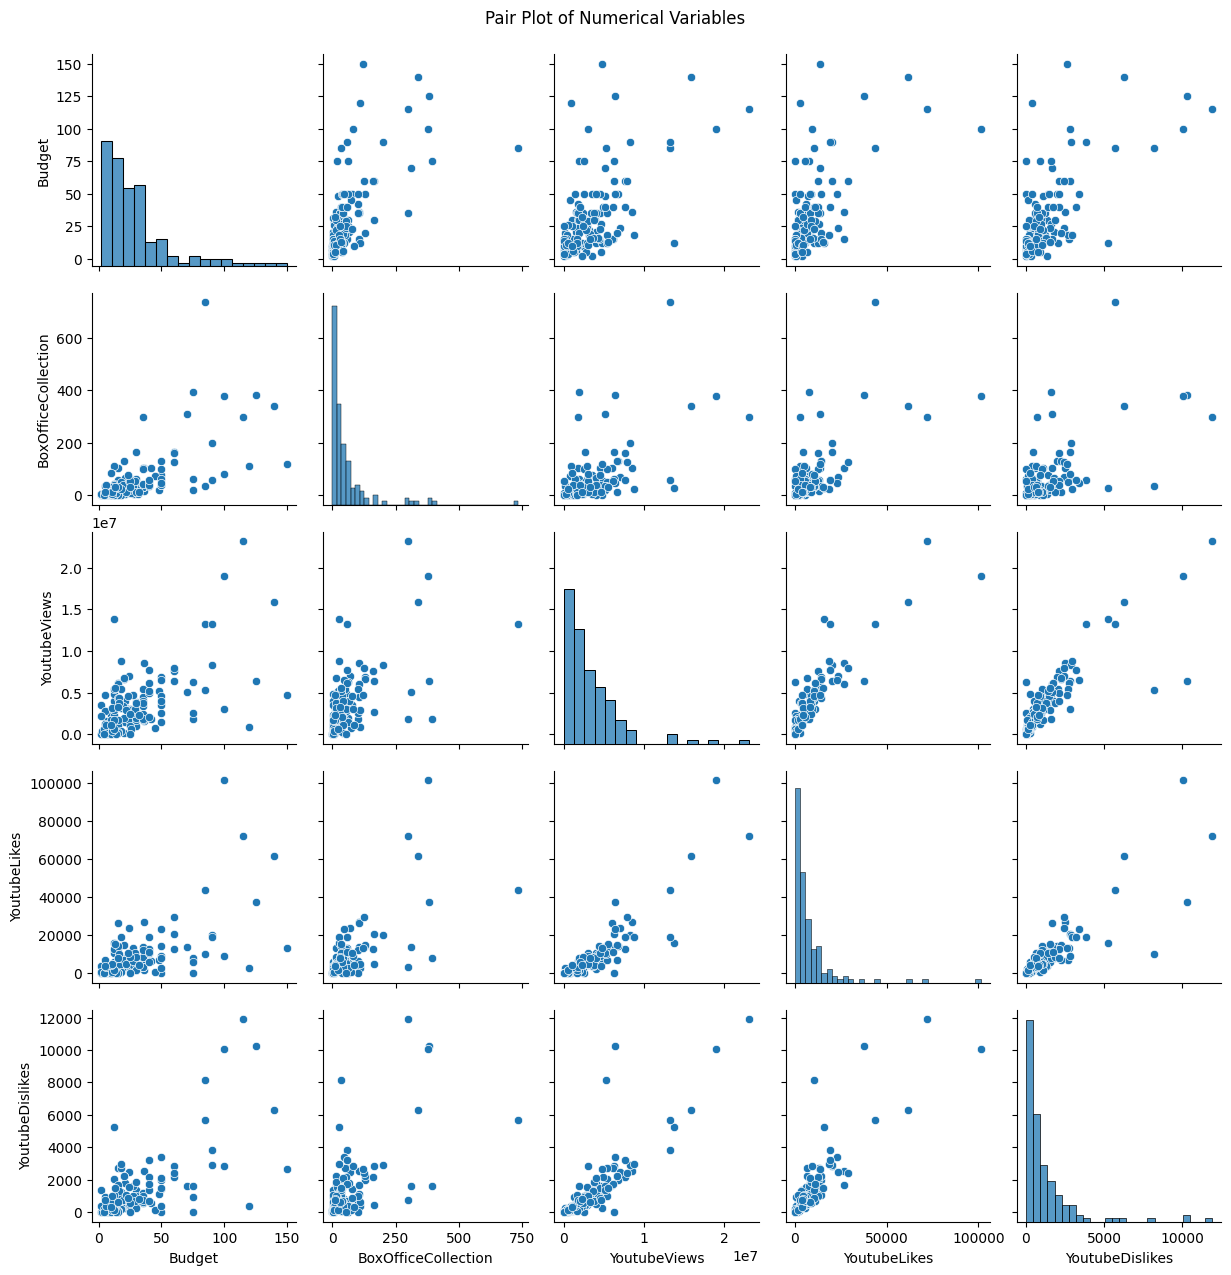

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_columns = ['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']
correlation_df = df[correlation_columns]

sns.pairplot(correlation_df)
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()